In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

In [3]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.1 ; cuda:  cu118
detectron2: 0.6


In [4]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [16]:
def detect_objects(path='./1.png', threshhold=0.3):
    im = cv2.imread(path)
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = threshhold # set threshold for this model
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
    predictor = DefaultPredictor(cfg)
    outputs = predictor(im)
    print(outputs["instances"].pred_classes)
    print(outputs["instances"].pred_boxes)
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

[10/22 13:29:56 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
tensor([0], device='cuda:0')
Boxes(tensor([[148.3622,  68.2535, 380.3880, 726.1514]], device='cuda:0'))


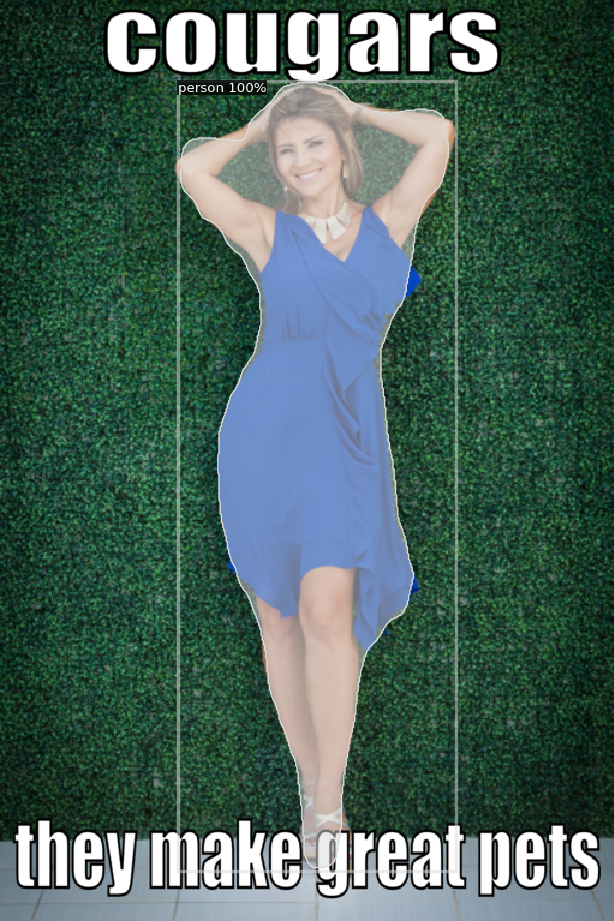

In [13]:
detect_objects()

[10/22 13:30:12 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
tensor([ 0, 45, 69, 45, 69], device='cuda:0')
Boxes(tensor([[267.2390,   7.7837, 473.0156, 236.3992],
        [393.2639, 157.3920, 470.5736, 238.1355],
        [223.0049,  69.0405, 539.3481, 323.2122],
        [305.7315, 153.9356, 409.8765, 252.0722],
        [233.4627,  59.0547, 304.4460, 242.9365]], device='cuda:0'))


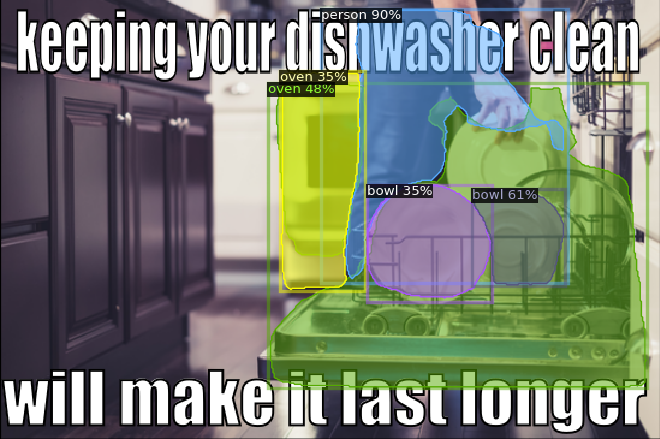

In [14]:
detect_objects('./2.png')

[10/22 13:50:45 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
tensor([ 0, 39, 39,  0], device='cuda:0')
Boxes(tensor([[214.6436,  91.1997, 377.2012, 292.1826],
        [ 34.5193, 160.9474,  49.8942, 199.2770],
        [142.0970,  78.1302, 157.0356, 137.5748],
        [357.4031,  92.3325, 491.6703, 345.9516]], device='cuda:0'))


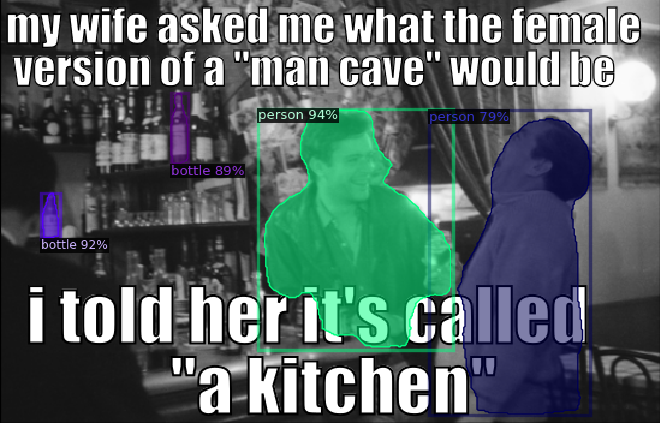

In [18]:
detect_objects('./3.png', 0.7)

[10/22 14:07:07 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
tensor([14, 14], device='cuda:0')
Boxes(tensor([[386.1082, 171.6291, 497.6846, 296.7227],
        [ 24.5401, 167.0145, 151.2454, 292.2734]], device='cuda:0'))


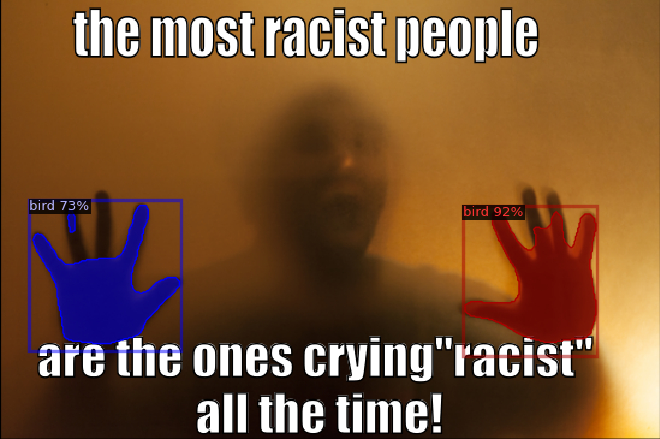

In [20]:
detect_objects('./05689.png', 0.7)

[10/22 14:07:52 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
tensor([11, 11,  9,  0,  0], device='cuda:0')
Boxes(tensor([[441.1172, 147.6249, 535.7957, 253.4587],
        [575.8106, 147.1980, 666.0654, 245.3306],
        [ 10.7114, 255.0110, 187.9998, 613.8990],
        [288.6333, 487.5341, 400.8555, 636.5780],
        [121.6730, 352.3377, 270.8924, 652.1025]], device='cuda:0'))


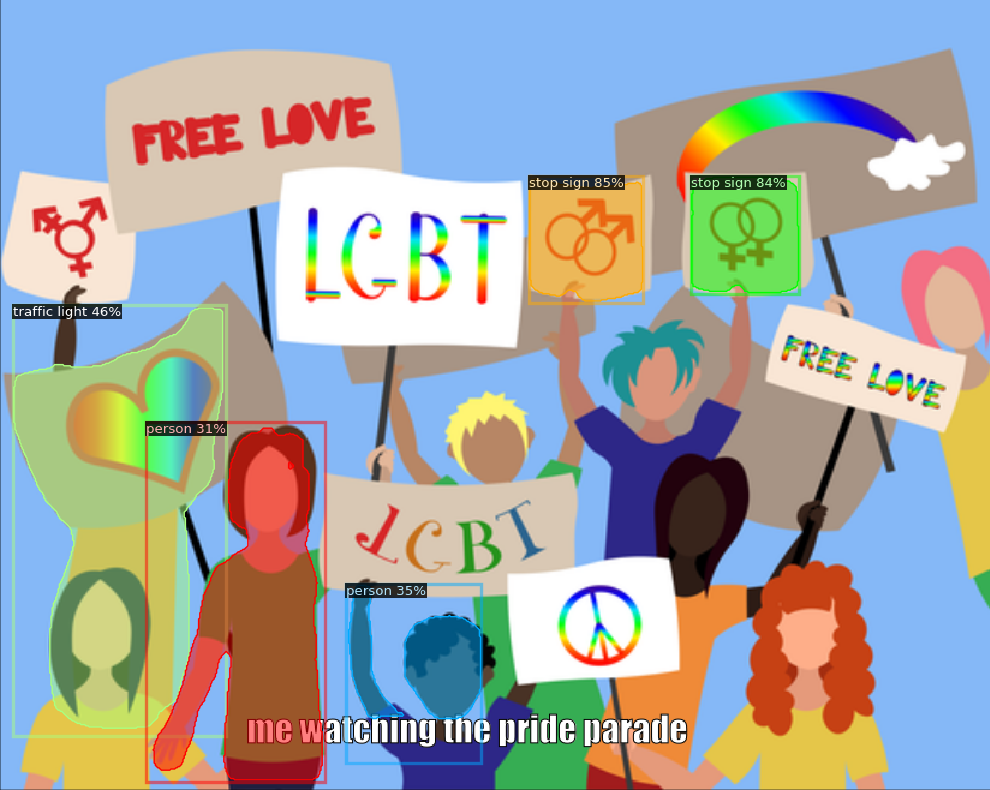

In [22]:
detect_objects('./05879.png', 0.2)

In [62]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2 import model_zoo

from google.colab.patches import cv2_imshow

import cv2
import numpy as np

class Detector:
    def __init__(self) -> None:
        self.cfg = get_cfg()
        # load model
        self.cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
        self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
        self.cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
        self.cfg.MODEL.DEVICE = 'cpu' # 'cuda' or 'cpu'

        self.predictor = DefaultPredictor(self.cfg)

    def onImage(self, imagePath):
        image = cv2.imread(imagePath)
        predictions = self.predictor(image)
        metadata = MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0])

        v = Visualizer(image[:, :, ::-1], metadata, scale=1.2)
        out = v.draw_instance_predictions(predictions["instances"].to("cpu"))
        cv2_imshow(out.get_image()[:, :, ::-1])
        # metadata.thing_classes
        return (metadata.thing_classes, predictions["instances"].to("cpu").get_fields()['pred_boxes'].tensor.numpy().tolist(), predictions["instances"].to("cpu").get_fields()['pred_classes'].numpy().tolist())
        # viz = Visualizer(image[:, :, ::-1], metadata = MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0]), scale=1.2,
        #                 instance_mode=ColorMode.IMAGE_BW)

        # output = viz.draw_instance_predictions(predictions["instances"].to("cpu"))
        # cv2.imshow("output", output.get_image()[:, :, ::-1])
        # cv2.waitKey(0)

In [63]:
# cfg = get_cfg()
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
# cfg.MODEL.DEVICE = 'cpu' # 'cuda' or 'cpu'
# metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])

[10/22 15:15:24 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


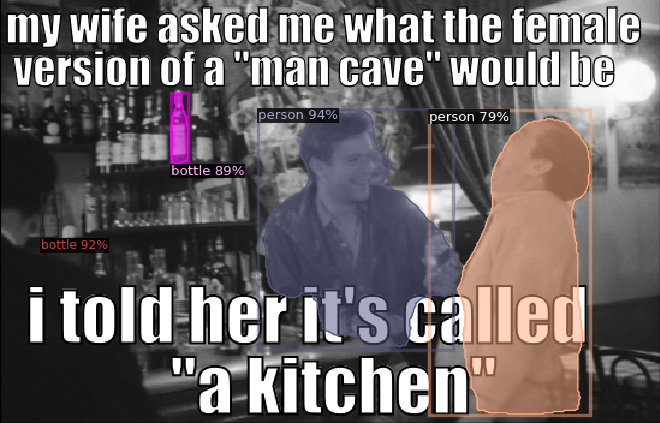

In [64]:
detector = Detector()
results = detector.onImage('./3.png')

In [65]:
def create_bbox_dict(class_boxes, class_labels, class_names):
    bbox_dict = {}

    for i, (box, class_index) in enumerate(zip(class_boxes, class_labels)):
        class_name = class_names[class_index]
        if class_name not in bbox_dict:
            bbox_dict[class_name] = []

        bbox_dict[class_name].append(box)

    return bbox_dict

In [70]:
create_bbox_dict(results[1], results[2], results[0])

{'person': [[214.6436004638672,
   91.19966125488281,
   377.201171875,
   292.18267822265625],
  [357.4031066894531, 92.33243560791016, 491.670166015625, 345.9516296386719]],
 'bottle': [[34.519351959228516,
   160.94737243652344,
   49.89424133300781,
   199.27703857421875],
  [142.09695434570312,
   78.13021087646484,
   157.03561401367188,
   137.57476806640625]]}